In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 1. Sk Hynix EDA


In [3]:
sk_hynix = yf.download("000660.KS", start="2015-01-01", end="2025-11-13")
sk_hynix.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_3272\974779769.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sk_hynix = yf.download("000660.KS", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,000660.KS,000660.KS,000660.KS,000660.KS,000660.KS
Date,,,,,
2015-01-02,41524.921875,42090.182592,41437.958688,41698.848249,1155944
2015-01-05,41437.968750,42090.192812,41307.523938,41785.821583,1409146
2015-01-06,41307.527344,41394.490559,40785.748051,40872.711266,1661196
2015-01-07,41220.562500,41394.488924,40611.820016,40611.820016,1821266
2015-01-08,43438.121094,43481.602696,41655.375383,41959.746602,5006675


In [4]:
sk_hynix.tail()

Price,Close,High,Low,Open,Volume
Ticker,000660.KS,000660.KS,000660.KS,000660.KS,000660.KS
Date,,,,,
2025-11-06,593000.0,607000.0,583000.0,602000.0,5321244
2025-11-07,580000.0,599000.0,565000.0,577000.0,4789397
2025-11-10,606000.0,615000.0,581000.0,584000.0,4893645
2025-11-11,619000.0,646000.0,604000.0,622000.0,5508697
2025-11-12,617000.0,620000.0,601000.0,605000.0,2831484


In [5]:
sk_hynix.shape

(2663, 5)

In [6]:
sk_hynix.describe()


Price,Close,High,Low,Open,Volume
Ticker,000660.KS,000660.KS,000660.KS,000660.KS,000660.KS
count,2663.000000,2663.000000,2663.000000,2663.000000,2.663000e+03
mean,98752.694424,100238.377823,97239.492936,98708.053225,3.655542e+06
std,70714.735810,71946.491500,68937.306661,70181.297117,1.862178e+06
min,22761.335938,23203.303195,22672.937217,22761.332712,0.000000e+00
25%,60505.072266,61087.644355,59654.153082,60403.439691,2.444629e+06
50%,79526.945312,80628.429463,78540.095941,79526.946890,3.270655e+06
75%,118145.589844,119798.111974,116470.389921,118373.751276,4.401914e+06
max,620000.000000,646000.000000,604000.000000,622000.000000,1.915065e+07


In [7]:
sk_hynix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2663 entries, 2015-01-02 to 2025-11-12
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, 000660.KS)   2663 non-null   float64
 1   (High, 000660.KS)    2663 non-null   float64
 2   (Low, 000660.KS)     2663 non-null   float64
 3   (Open, 000660.KS)    2663 non-null   float64
 4   (Volume, 000660.KS)  2663 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 124.8 KB


In [8]:
#Correlation between attributes
sk_hynix.corr()

,Price,Close,High,Low,Open,Volume
,Ticker,000660.KS,000660.KS,000660.KS,000660.KS,000660.KS
Price,Ticker,,,,,
Close,000660.KS,1.000000,0.999738,0.999568,0.999195,0.103874
High,000660.KS,0.999738,1.000000,0.999600,0.999594,0.109439
Low,000660.KS,0.999568,0.999600,1.000000,0.999728,0.098840
Open,000660.KS,0.999195,0.999594,0.999728,1.000000,0.104928
Volume,000660.KS,0.103874,0.109439,0.098840,0.104928,1.000000


In [9]:
# .pct_change->어제 사고, 오늘 팔았을 때의 수익률(종가 기준)
sk_hynix['Returns'] = sk_hynix['Close'].pct_change()
sk_hynix['LogReturns'] = np.log(sk_hynix['Close'] / sk_hynix['Close'].shift(1))
sk_hynix.head()

Price,Close,High,Low,Open,Volume,Returns,LogReturns
Ticker,000660.KS,000660.KS,000660.KS,000660.KS,000660.KS,,
Date,,,,,,,
2015-01-02,41524.921875,42090.182592,41437.958688,41698.848249,1155944,NaN,NaN
2015-01-05,41437.968750,42090.192812,41307.523938,41785.821583,1409146,-0.002094,-0.002096
2015-01-06,41307.527344,41394.490559,40785.748051,40872.711266,1661196,-0.003148,-0.003153
2015-01-07,41220.562500,41394.488924,40611.820016,40611.820016,1821266,-0.002105,-0.002108
2015-01-08,43438.121094,43481.602696,41655.375383,41959.746602,5006675,0.053797,0.052400


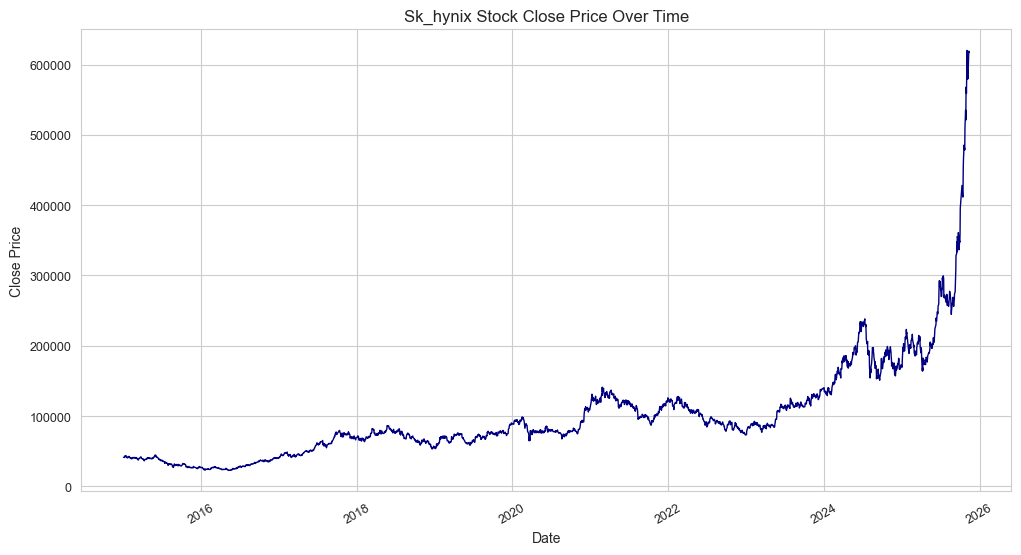

In [10]:
plt.figure(figsize=(12,6))
plt.plot(sk_hynix.index, sk_hynix['Close'], color='navy', linewidth=1)

plt.title('Sk_hynix Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.show()

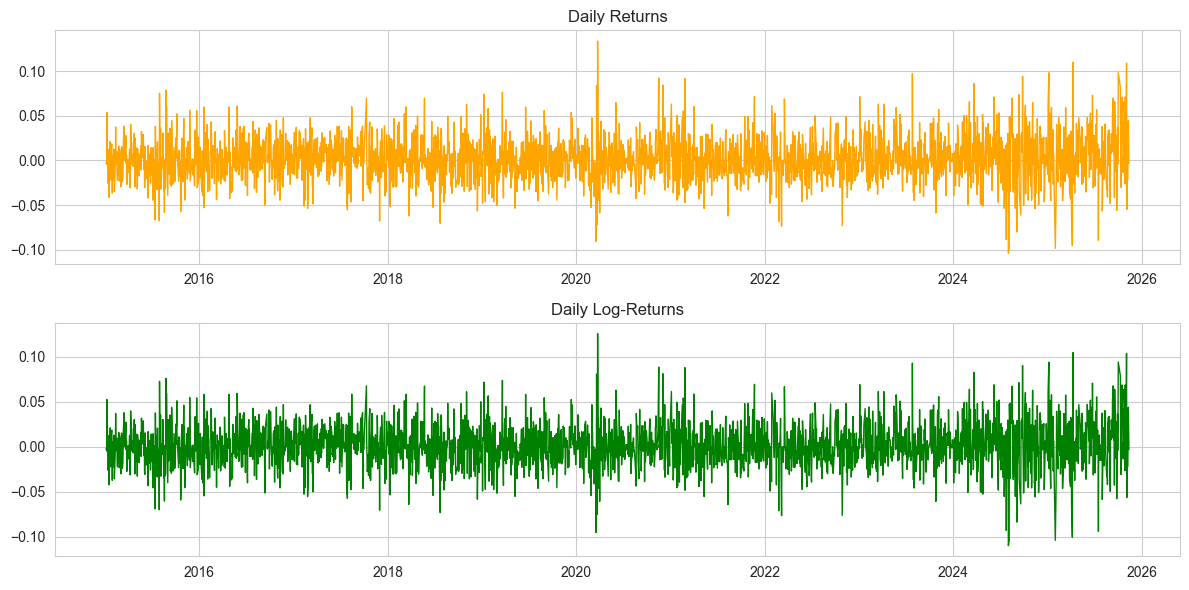

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(sk_hynix.index, sk_hynix['Returns'], color='orange', linewidth=1)
plt.title('Daily Returns')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(sk_hynix.index, sk_hynix['LogReturns'], color='green', linewidth=1)
plt.title('Daily Log-Returns')
plt.grid(True)

plt.tight_layout()
plt.show()

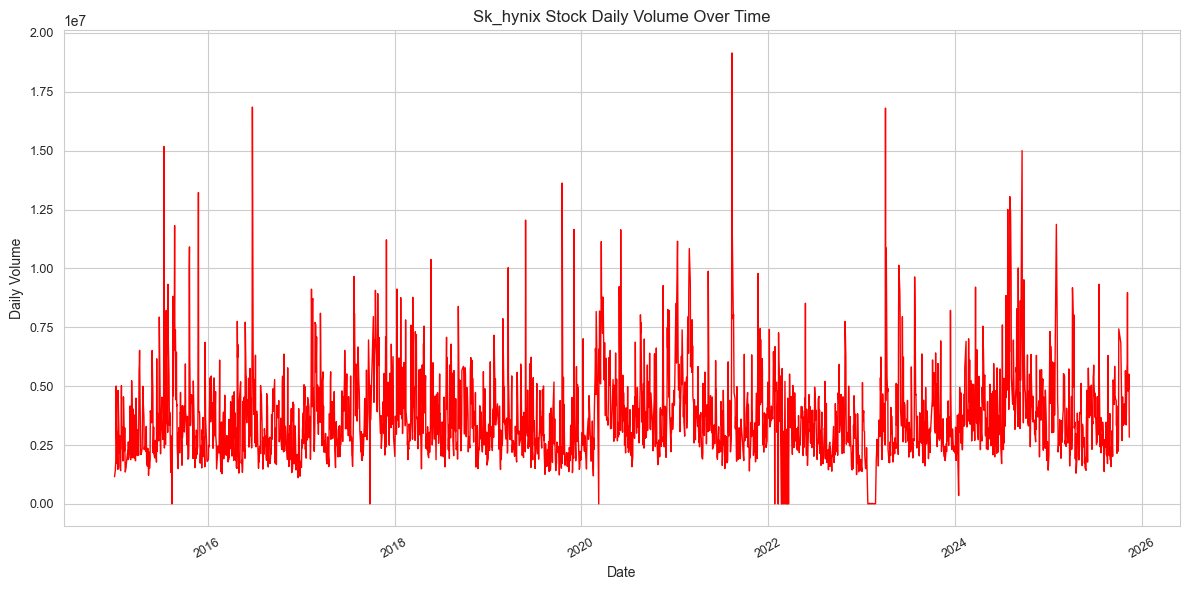

In [12]:
plt.figure(figsize=(12,6))
plt.plot(sk_hynix.index, sk_hynix['Volume'], color='red', linewidth=1)
plt.title('Sk_hynix Stock Daily Volume Over Time') 
plt.xlabel('Date')
plt.ylabel('Daily Volume')
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

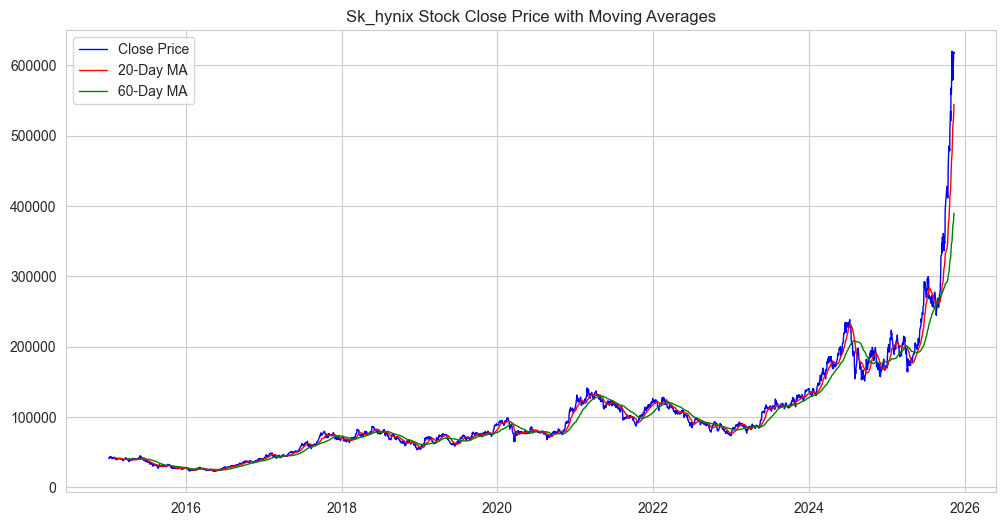

In [13]:
##5. Moving Averages
sk_hynix['MA20'] = sk_hynix['Close'].rolling(window=20).mean()
sk_hynix['MA60'] = sk_hynix['Close'].rolling(window=60).mean()

plt.figure(figsize=(12,6))
plt.plot(sk_hynix.index, sk_hynix['Close'], label='Close Price', color='blue', linewidth=1)
plt.plot(sk_hynix.index, sk_hynix['MA20'], label='20-Day MA', color='red', linewidth=1)
plt.plot(sk_hynix.index, sk_hynix['MA60'], label='60-Day MA', color='green', linewidth=1)
plt.title('Sk_hynix Stock Close Price with Moving Averages')    
plt.legend()

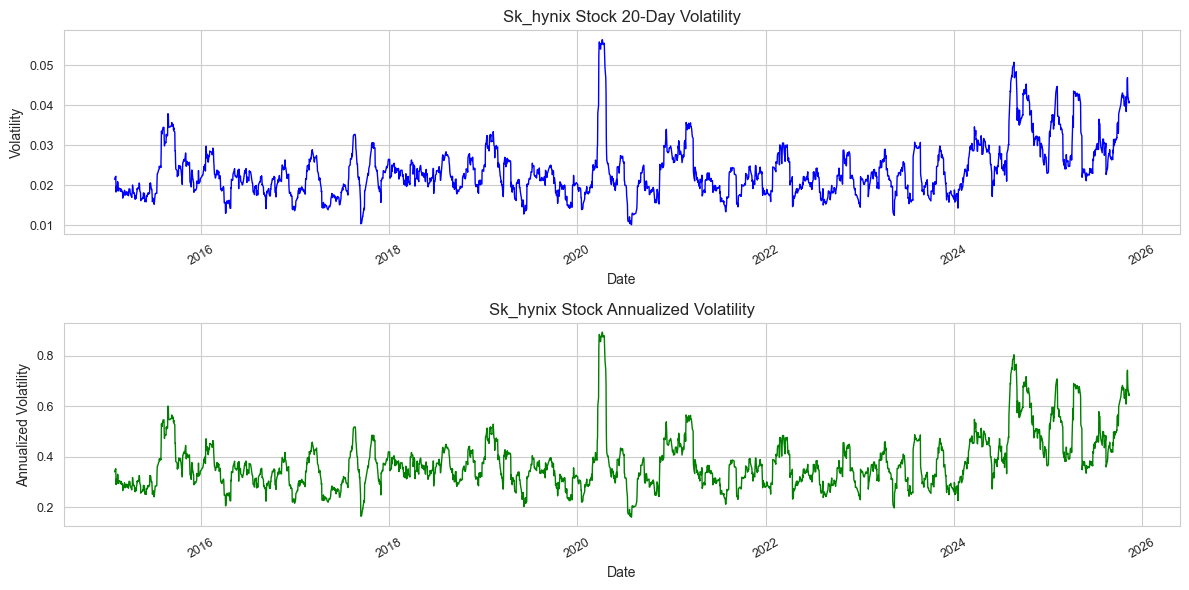

In [14]:
##Volatility Analysis(Window=20)
sk_hynix['Volatility20'] = sk_hynix['Returns'].rolling(window=20).std()
sk_hynix['Volatility'] = sk_hynix['Volatility20']* np.sqrt(252)  #Annualized Volatility

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(sk_hynix['Volatility20'], color='blue', linewidth=1)
plt.title('Sk_hynix Stock 20-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(sk_hynix['Volatility'], color='green', linewidth=1)
plt.title('Sk_hynix Stock Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

## Stationary Check, Seasonal Decomposition

In [15]:
### 7. Stationary Check(ADF Test, ACF/PACF Plots)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

adf_result = adfuller(sk_hynix['Close'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: 3.106936560745486
p-value: 1.0


(1) ADF Test: 앞선 plot 이미 확인가능했지만, non-stationary

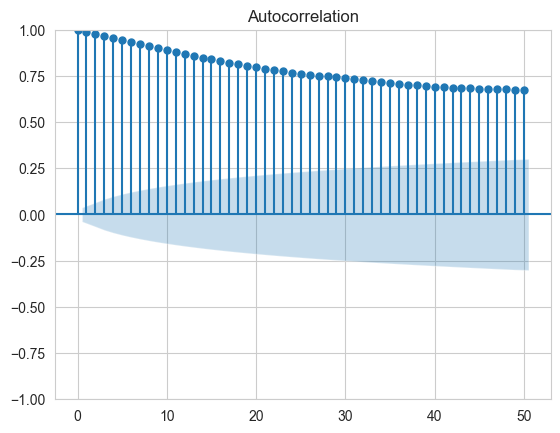

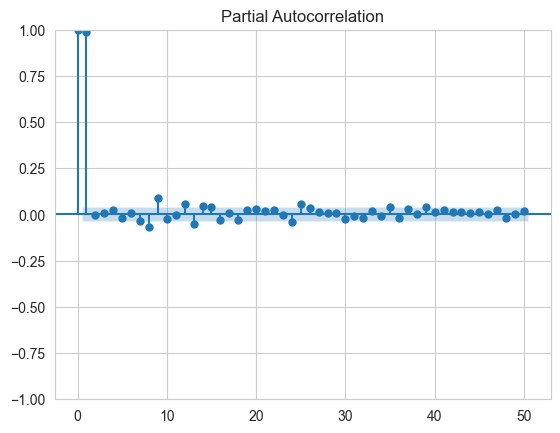

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sk_hynix['Close'].dropna(), lags=50)
plot_pacf(sk_hynix['Close'].dropna(), lags=50)
plt.show()

(2) ACF 매우 천천히 감소, 1에 가깝게 유지->추세 존재 , non-stationary

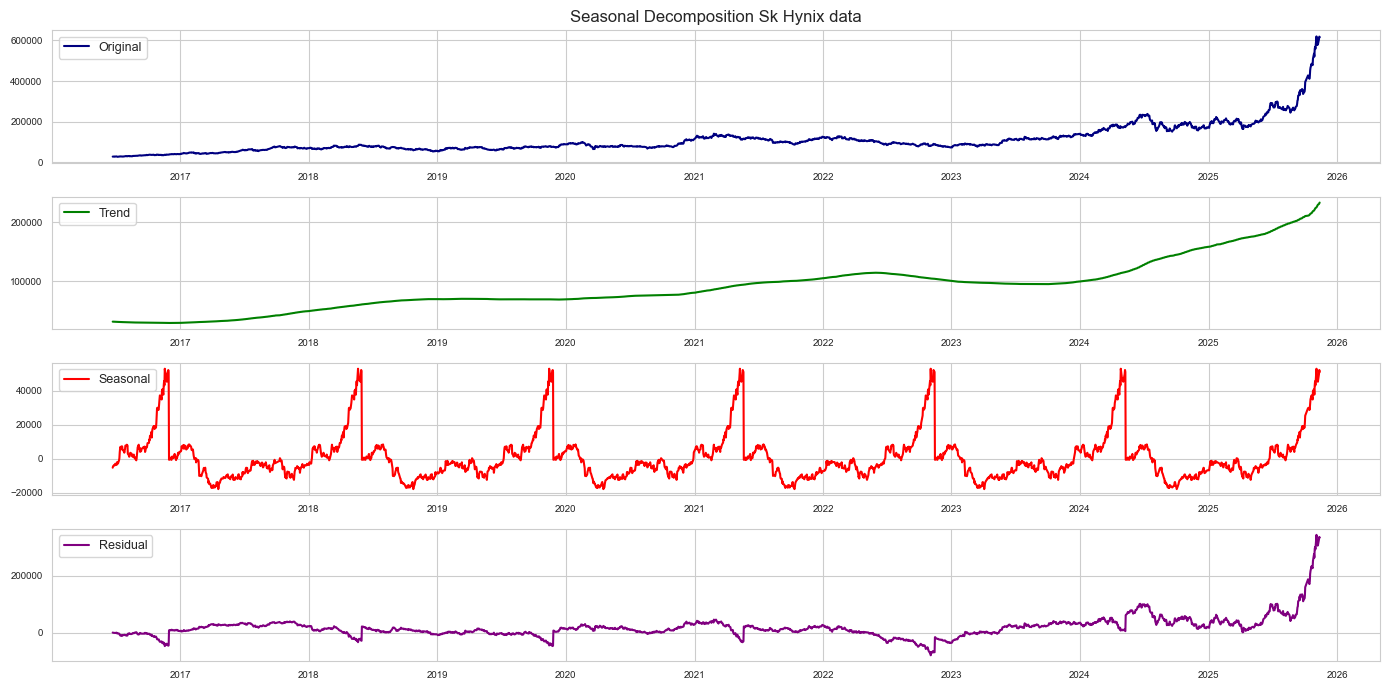

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(sk_hynix['Close'], model='additive', period=365, two_sided=False)
original = sk_hynix['Close'].dropna()
trend = decomposed.trend.dropna()
seasonal = decomposed.seasonal.dropna()
resid = decomposed.resid.dropna()
# Calculating a common index
common_index = original.index.intersection(trend.index).intersection(seasonal.index).intersection(resid.index)

# Synchronised plots
plt.figure(figsize=(14, 7))

# Plot original data
plt.subplot(4, 1, 1)
plt.title("Seasonal Decomposition Sk Hynix data")
plt.plot(original.loc[common_index], label='Original', color='navy')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Trend plots
plt.subplot(4, 1, 2)
plt.plot(trend.loc[common_index], label='Trend', color='green')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Seasonality plots
plt.subplot(4, 1, 3)
plt.plot(seasonal.loc[common_index], label='Seasonal', color='red')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Residuals Plot
plt.subplot(4, 1, 4)
plt.plot(resid.loc[common_index], label='Residual', color='purple')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

(3) Seasonal Decompose: 전체적으로 우상향, 1.5 년 주기로 상승 하락

## Distribution Analysis(Jarque-Bera Test, skewness, kurtosis)

In [18]:
#Step1: Jarque–Bera Test
from scipy.stats import jarque_bera, probplot
def jarque_bera_test(data):
    stat, p = jarque_bera(data.dropna())
    print("Jarque-Bera Statistic:", stat)

    if p > 0.05:
        print("정규분포 가정 OK")
    else:
        print("정규분포 아님")
jarque_bera_test(sk_hynix['Close'])

Jarque-Bera Statistic: 21972.452840154587
정규분포 아님


In [19]:
from scipy.stats import skew, kurtosis

sk_close = sk_hynix['Close'].dropna()

print("Skewness:", skew(sk_close))
print("Kurtosis:", kurtosis(sk_close, fisher=False))  # 3=normal baseline


Skewness: [2.79346658]
Kurtosis: [15.91551535]


1. kurtosis> 3으로 일반적인 주식 데이터의 fat-tail 성질을 따름 (정규 분포 아님)
2. skewness>0, right-skew->분포가 오른쪽으로 길게 늘어짐. 급등 확률이 급락 확률보다 높다(?)

다소 당연하지만, SK 종가 데이터는 정규 분포를 따르지 않음을 알 수 있음

In [20]:
# Daily Return
sk_return = sk_hynix['Returns'].dropna()
jarque_bera_test(sk_return)
print("Skewness:", skew(sk_return))
print("Kurtosis:", kurtosis(sk_return, fisher=False))  # 3=normal baseline

Jarque-Bera Statistic: 333.64820075925286
정규분포 아님
Skewness: 0.2638114424872227
Kurtosis: 4.65218403016932


In [21]:
# Daily Log Return
sk_log_return = sk_hynix['LogReturns'].dropna()
jarque_bera_test(sk_log_return)
print("Skewness:", skew(sk_log_return))
print("Kurtosis:", kurtosis(sk_log_return, fisher=False))  # 3=normal baseline


Jarque-Bera Statistic: 285.67249422437493
정규분포 아님
Skewness: 0.1327904872695017
Kurtosis: 4.582727526587515


daily log return 또한 확인 결과 정규분포를 따르지 않음
->그래도 daily log return이 close, daily return보다는 정규분포에 좀 더 가까운 형태라고 볼 수 있음

Global outlier 잡아내기보다 local outlier에 집중하는 것이 이상적이라 판단->
window size = 20으로 설정하여 rolling mean,std 계산 후, 평균으로부터 3sigma 를 초과하여 떨어진 지점들을 outlier로 지정
->그래프 상에서 해당 지점이 주변부에 비해 급락/급등하는 지점임을 확인할 수 있고, 해당 지점에서 특정 news,event 발생 확률이 높다고 해석

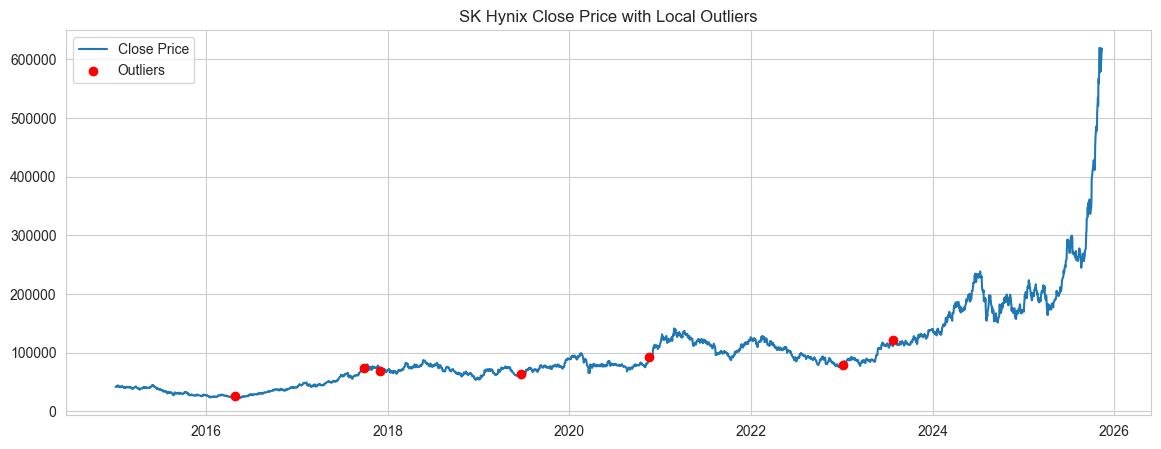

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


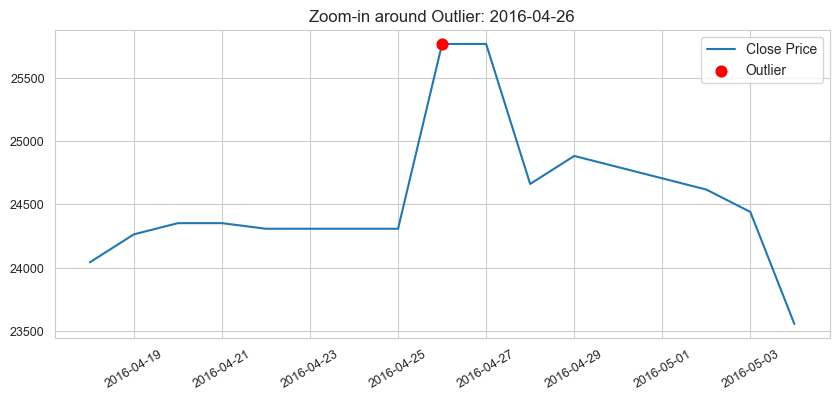

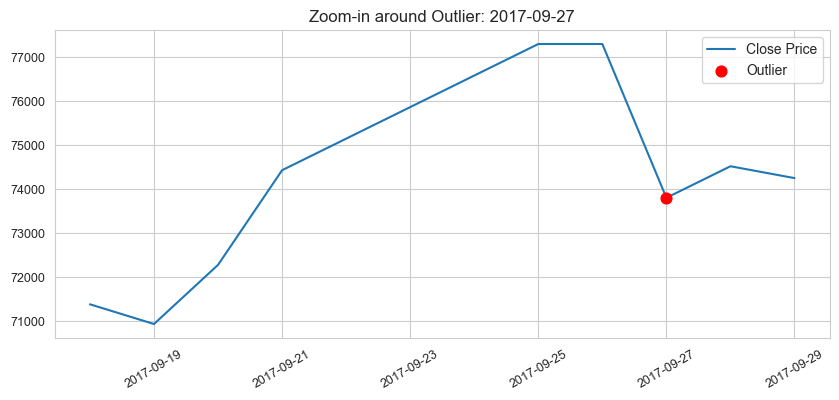

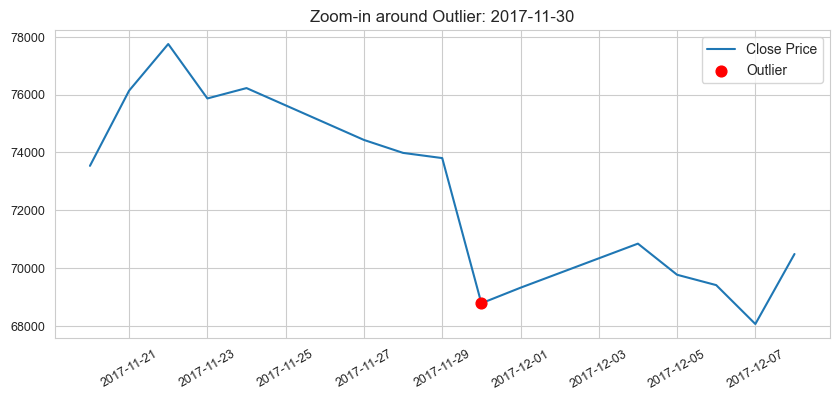

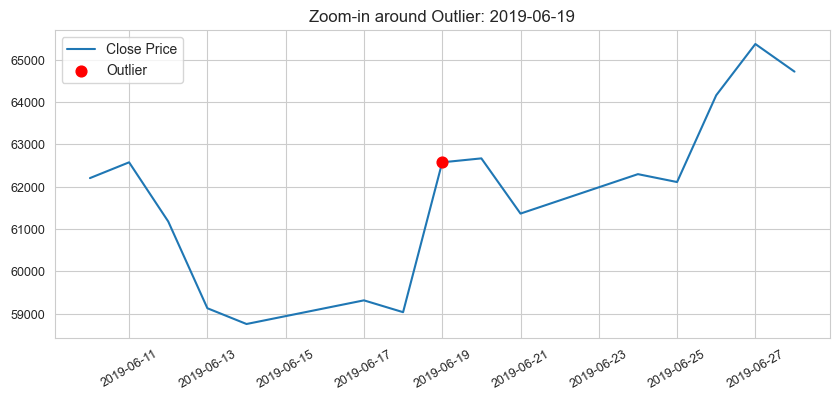

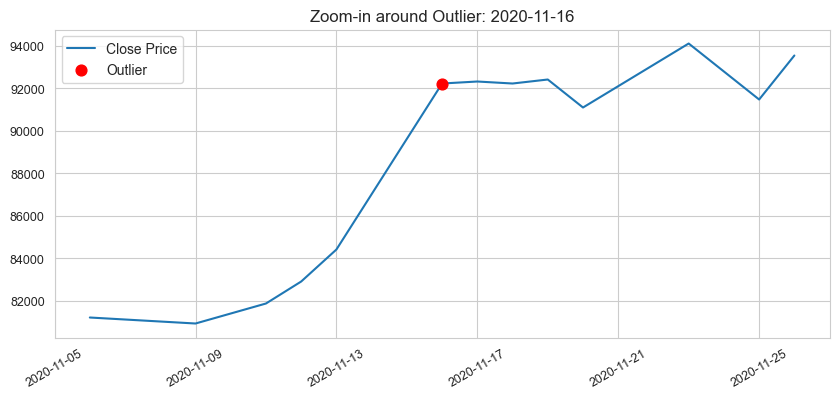

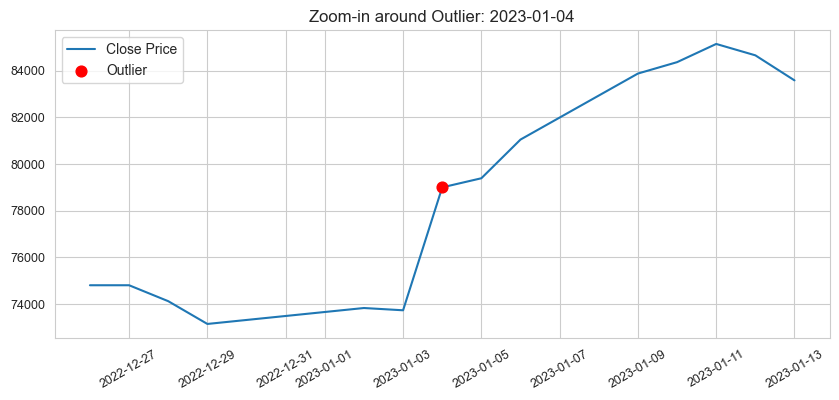

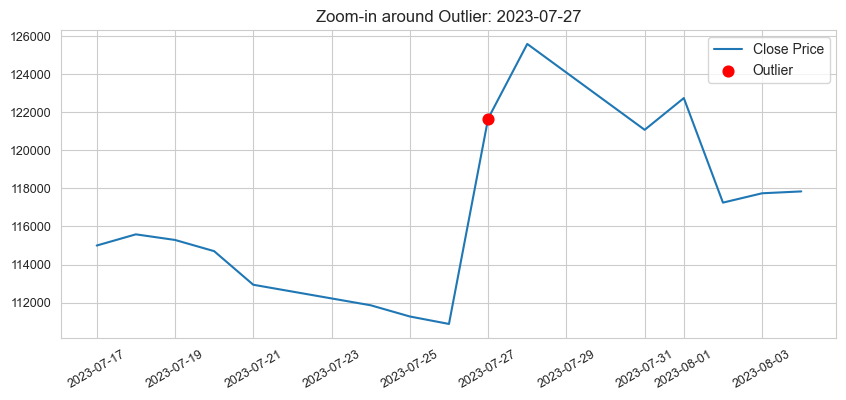

In [22]:
import matplotlib.pyplot as plt

## LogReturn 기반 outlier detection
returns = sk_hynix['LogReturns'].dropna()
roll_mean = returns.rolling(20).mean()
roll_std  = returns.rolling(20).std()

z_local = (returns - roll_mean) / roll_std
local_outlier = z_local.abs() > 3

outlier_dates = returns.index[local_outlier]
outlier_close = sk_hynix.loc[outlier_dates, 'Close']

# 전체 Close + Outlier 표시
plt.figure(figsize=(14,5))
plt.plot(sk_hynix['Close'], label='Close Price')
plt.scatter(outlier_dates, outlier_close, color='red', label='Outliers', zorder=5)
plt.title("SK Hynix Close Price with Local Outliers")
plt.grid(True)
plt.legend()
plt.show()


window = 10  # 앞뒤 10일씩 확대

for date in outlier_dates:
    start = date - pd.Timedelta(days=window)
    end   = date + pd.Timedelta(days=window)

    zoom_data = sk_hynix.loc[start:end]

    plt.figure(figsize=(10,4))
    plt.plot(zoom_data['Close'], label='Close Price')
    plt.xticks(rotation=30, fontsize=9)
    plt.yticks(fontsize=9)
    plt.scatter([date], [sk_hynix.loc[date, 'Close']], 
                color='red', s=60, label='Outlier', zorder=5)
    plt.title(f"Zoom-in around Outlier: {date.date()}")
    plt.grid(True)
    plt.legend()
    plt.show()


# 2 .NVIDIA(NVDA) EDA


In [23]:
nvda = yf.download("NVDA", start="2015-01-01", end="2025-11-13")
nvda.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_3272\3384689714.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda = yf.download("NVDA", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483038,0.486638,0.475360,0.483038,113680000
2015-01-05,0.474880,0.484478,0.472720,0.483038,197952000
2015-01-06,0.460482,0.476079,0.460002,0.475599,197764000
2015-01-07,0.459282,0.467921,0.457843,0.463842,321808000
2015-01-08,0.476559,0.479439,0.464321,0.464561,283780000


In [24]:
nvda.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-11-06,188.080002,197.619995,186.380005,196.419998,223029800
2025-11-07,188.149994,188.320007,178.910004,184.899994,264942300
2025-11-10,199.050003,199.940002,193.789993,195.110001,198897100
2025-11-11,193.160004,195.419998,191.300003,195.160004,176483300
2025-11-12,193.800003,195.889999,191.130005,195.720001,154935300


In [25]:
nvda.shape

(2733, 5)

In [26]:
nvda.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,2733.000000,2733.000000,2733.000000,2733.000000,2.733000e+03
mean,31.009719,31.540059,30.423417,31.010240,4.484149e+08
std,47.357878,48.118027,46.530525,47.389016,2.534414e+08
min,0.459282,0.467921,0.454483,0.463602,5.244800e+07
25%,3.738724,3.803047,3.658311,3.747713,2.841920e+08
50%,8.902652,9.079309,8.714533,8.956870,3.978940e+08
75%,27.780457,28.368632,27.224430,27.804439,5.431120e+08
max,207.039993,212.190002,205.559998,208.080002,3.692928e+09


In [27]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2733 entries, 2015-01-02 to 2025-11-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   2733 non-null   float64
 1   (High, NVDA)    2733 non-null   float64
 2   (Low, NVDA)     2733 non-null   float64
 3   (Open, NVDA)    2733 non-null   float64
 4   (Volume, NVDA)  2733 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.1 KB


In [28]:
#Correlation between attributes
nvda.corr()

,Price,Close,High,Low,Open,Volume
,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Price,Ticker,,,,,
Close,NVDA,1.000000,0.999797,0.999838,0.999594,-0.291619
High,NVDA,0.999797,1.000000,0.999749,0.999846,-0.289217
Low,NVDA,0.999838,0.999749,1.000000,0.999781,-0.293558
Open,NVDA,0.999594,0.999846,0.999781,1.000000,-0.291014
Volume,NVDA,-0.291619,-0.289217,-0.293558,-0.291014,1.000000


In [29]:
# .pct_change->어제 사고, 오늘 팔았을 때의 수익률(종가 기준)
nvda['Returns'] = nvda['Close'].pct_change()
nvda['LogReturns'] = np.log(nvda['Close'] / nvda['Close'].shift(1))
nvda.head()

Price,Close,High,Low,Open,Volume,Returns,LogReturns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,
Date,,,,,,,
2015-01-02,0.483038,0.486638,0.475360,0.483038,113680000,NaN,NaN
2015-01-05,0.474880,0.484478,0.472720,0.483038,197952000,-0.016890,-0.017035
2015-01-06,0.460482,0.476079,0.460002,0.475599,197764000,-0.030319,-0.030788
2015-01-07,0.459282,0.467921,0.457843,0.463842,321808000,-0.002605,-0.002609
2015-01-08,0.476559,0.479439,0.464321,0.464561,283780000,0.037617,0.036927


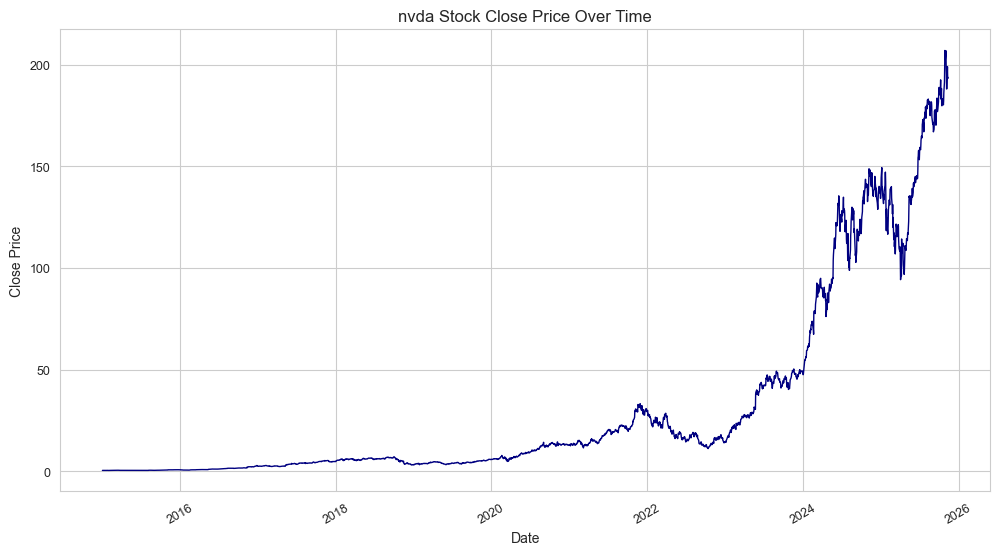

In [30]:
plt.figure(figsize=(12,6))
plt.plot(nvda.index, nvda['Close'], color='navy', linewidth=1)

plt.title('nvda Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.show()

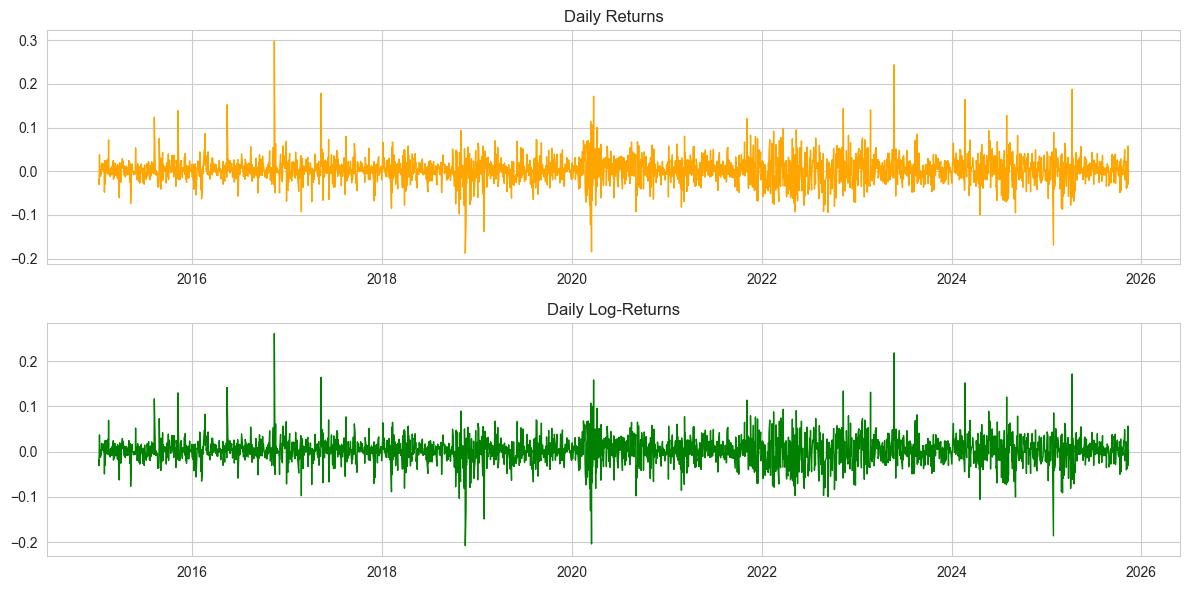

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(nvda.index, nvda['Returns'], color='orange', linewidth=1)
plt.title('Daily Returns')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(nvda.index, nvda['LogReturns'], color='green', linewidth=1)
plt.title('Daily Log-Returns')
plt.grid(True)

plt.tight_layout()
plt.show()

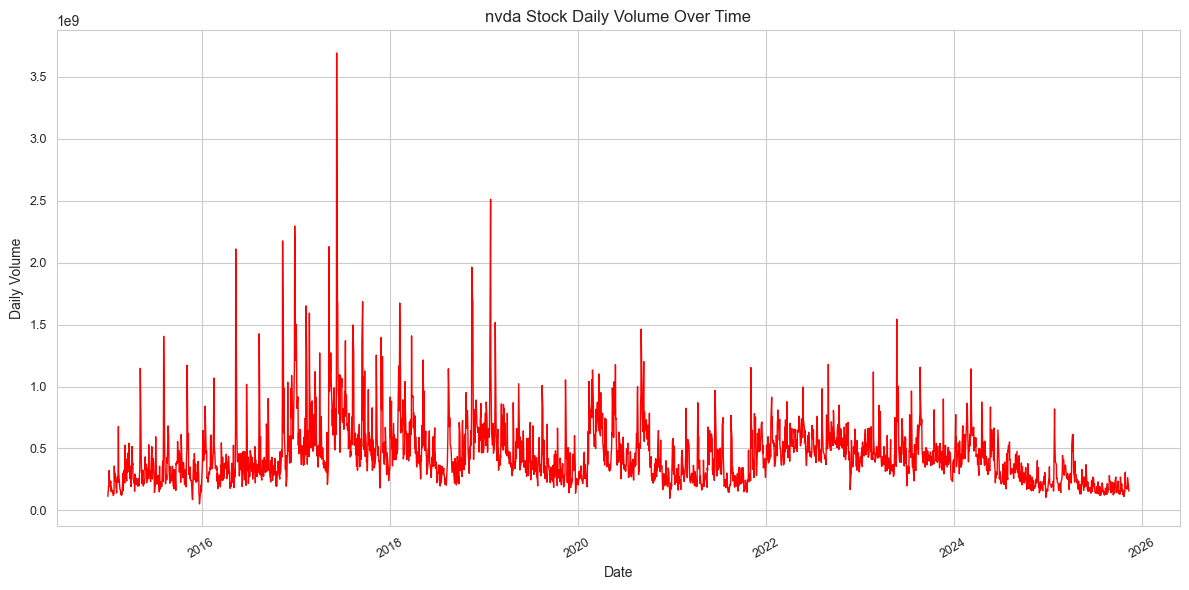

In [32]:
plt.figure(figsize=(12,6))
plt.plot(nvda.index, nvda['Volume'], color='red', linewidth=1)
plt.title('nvda Stock Daily Volume Over Time') 
plt.xlabel('Date')
plt.ylabel('Daily Volume')
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

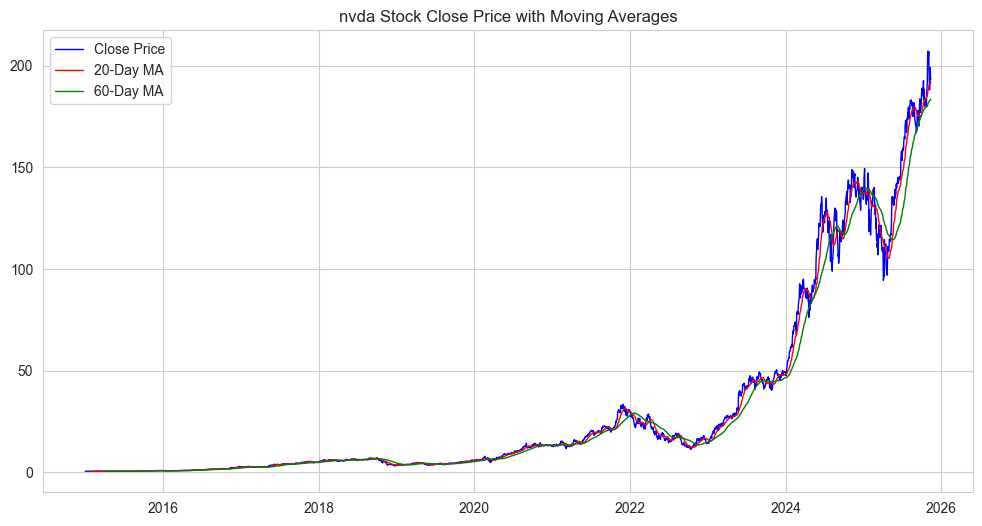

In [33]:
##5. Moving Averages
nvda['MA20'] = nvda['Close'].rolling(window=20).mean()
nvda['MA60'] = nvda['Close'].rolling(window=60).mean()

plt.figure(figsize=(12,6))
plt.plot(nvda.index, nvda['Close'], label='Close Price', color='blue', linewidth=1)
plt.plot(nvda.index, nvda['MA20'], label='20-Day MA', color='red', linewidth=1)
plt.plot(nvda.index, nvda['MA60'], label='60-Day MA', color='green', linewidth=1)
plt.title('nvda Stock Close Price with Moving Averages')    
plt.legend()

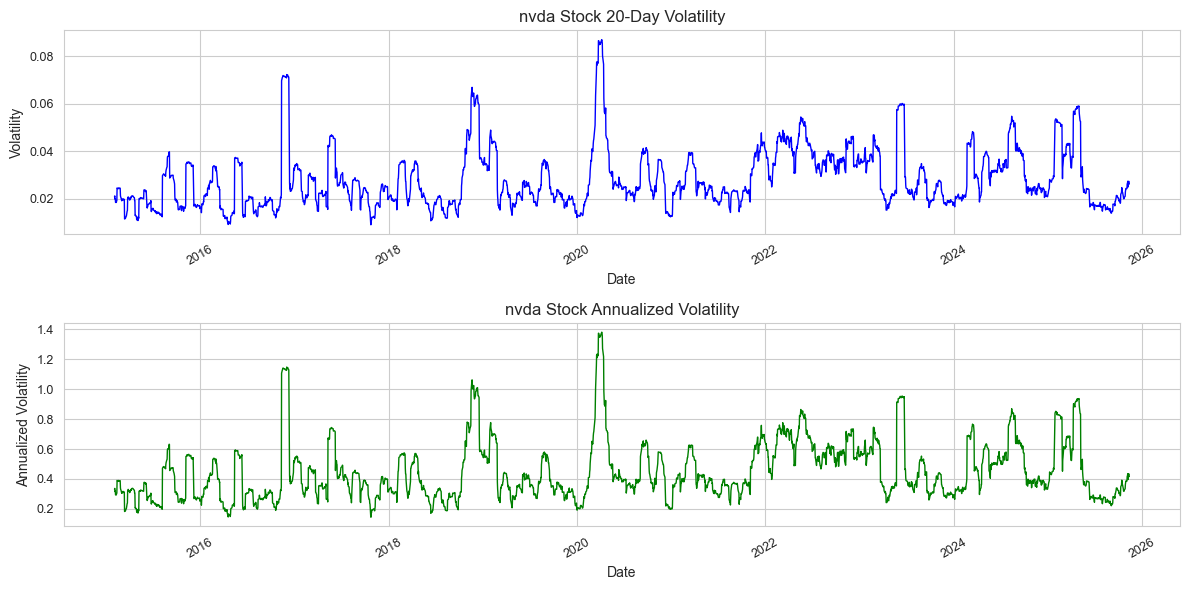

In [34]:
##Volatility Analysis(Window=20)
nvda['Volatility20'] = nvda['Returns'].rolling(window=20).std()
nvda['Volatility'] = nvda['Volatility20']* np.sqrt(252)  #Annualized Volatility

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(nvda['Volatility20'], color='blue', linewidth=1)
plt.title('nvda Stock 20-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(nvda['Volatility'], color='green', linewidth=1)
plt.title('nvda Stock Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

## Stationary Check, Seasonal Decomposition

In [35]:
### ADF Test
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

adf_result = adfuller(nvda['Close'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: 2.5291421298620493
p-value: 0.9990586492069474


(1) ADF Test: 앞선 plot 이미 확인가능했지만, non-stationary

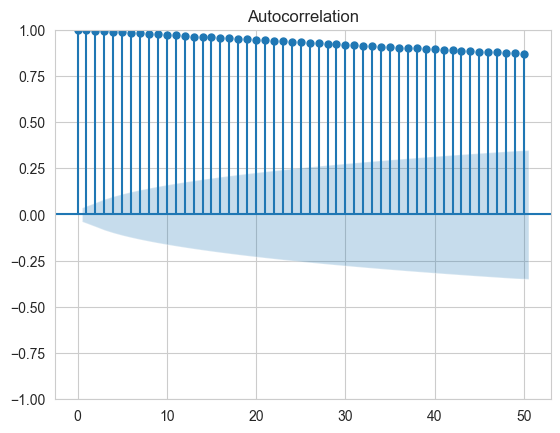

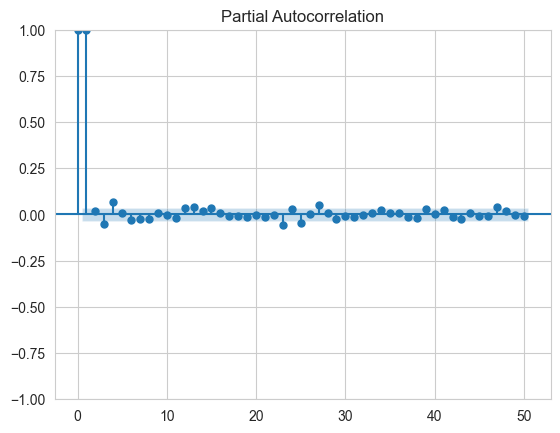

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(nvda['Close'].dropna(), lags=50)
plot_pacf(nvda['Close'].dropna(), lags=50)
plt.show()

(2) ACF 매우 천천히 감소, 1에 가깝게 유지->추세 존재 , non-stationary

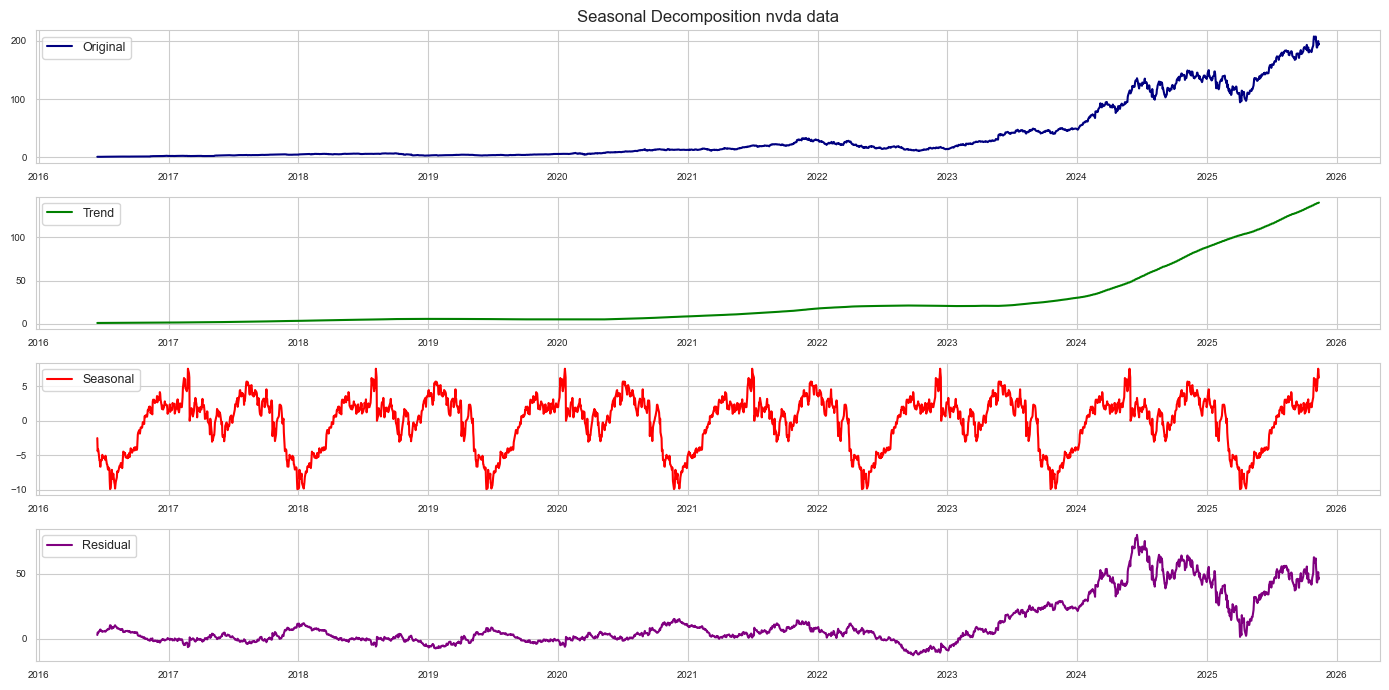

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nvda['Close'], model='additive', period=365, two_sided=False)
original = nvda['Close'].dropna()
trend = decomposed.trend.dropna()
seasonal = decomposed.seasonal.dropna()
resid = decomposed.resid.dropna()
# Calculating a common index
common_index = original.index.intersection(trend.index).intersection(seasonal.index).intersection(resid.index)

# Synchronised plots
plt.figure(figsize=(14, 7))

# Plot original data
plt.subplot(4, 1, 1)
plt.title("Seasonal Decomposition nvda data")
plt.plot(original.loc[common_index], label='Original', color='navy')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Trend plots
plt.subplot(4, 1, 2)
plt.plot(trend.loc[common_index], label='Trend', color='green')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Seasonality plots
plt.subplot(4, 1, 3)
plt.plot(seasonal.loc[common_index], label='Seasonal', color='red')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Residuals Plot
plt.subplot(4, 1, 4)
plt.plot(resid.loc[common_index], label='Residual', color='purple')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

(3) Seasonal Decompose: 전체적으로 우상향, 1.5 년 주기성 보임

## Distribution Analysis(Jarque-Bera Test, skewness, kurtosis)

In [38]:
#Step1: Jarque–Bera Test
from scipy.stats import jarque_bera, probplot
def jarque_bera_test(data):
    stat, p = jarque_bera(data.dropna())
    print("Jarque-Bera Statistic:", stat)

    if p > 0.05:
        print("정규분포 가정 OK")
    else:
        print("정규분포 아님")
jarque_bera_test(nvda['Close'])

Jarque-Bera Statistic: 2326.381002271647
정규분포 아님


In [39]:
from scipy.stats import skew, kurtosis

nvda_close = nvda['Close'].dropna()

print("Skewness:", skew(nvda_close))
print("Kurtosis:", kurtosis(nvda_close, fisher=False))  # 3=normal baseline


Skewness: [1.90099197]
Kurtosis: [5.44421142]


In [40]:
# Daily Return
nvda_return = nvda['Returns'].dropna()
jarque_bera_test(nvda_return)
print("Skewness:", skew(nvda_return))
print("Kurtosis:", kurtosis(nvda_return, fisher=False))  # 3=normal baseline

Jarque-Bera Statistic: 7863.962081536815
정규분포 아님
Skewness: 0.5577346441512128
Kurtosis: 11.236434332029273


In [41]:
# Daily Log Return
nvda_log_return = nvda['LogReturns'].dropna()
jarque_bera_test(nvda_log_return)
print("Skewness:", skew(nvda_log_return))
print("Kurtosis:", kurtosis(nvda_log_return, fisher=False))  # 3=normal baseline


Jarque-Bera Statistic: 5441.270349650606
정규분포 아님
Skewness: 0.13444635462965518
Kurtosis: 9.908547017344091


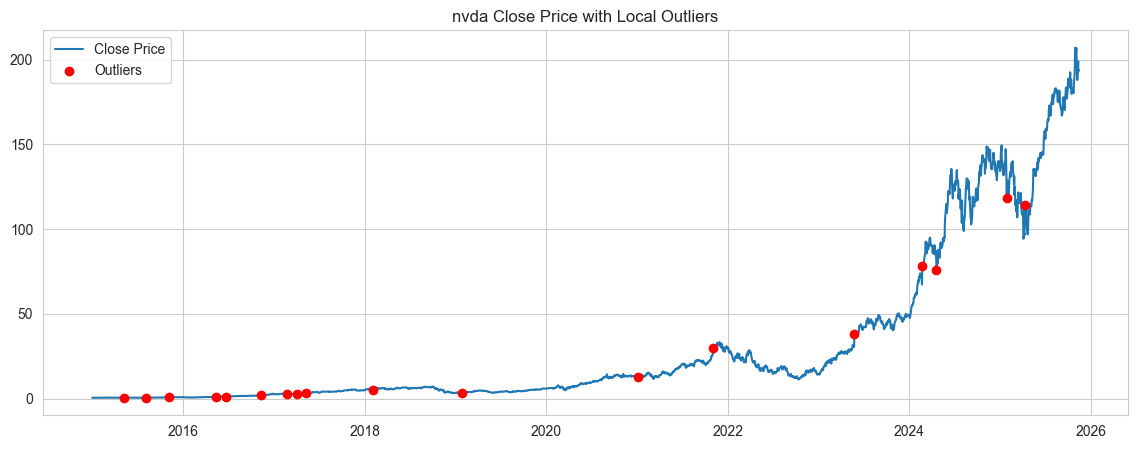

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


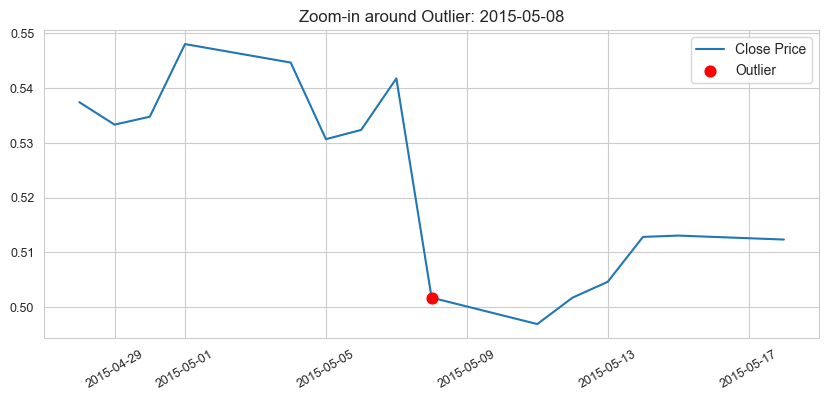

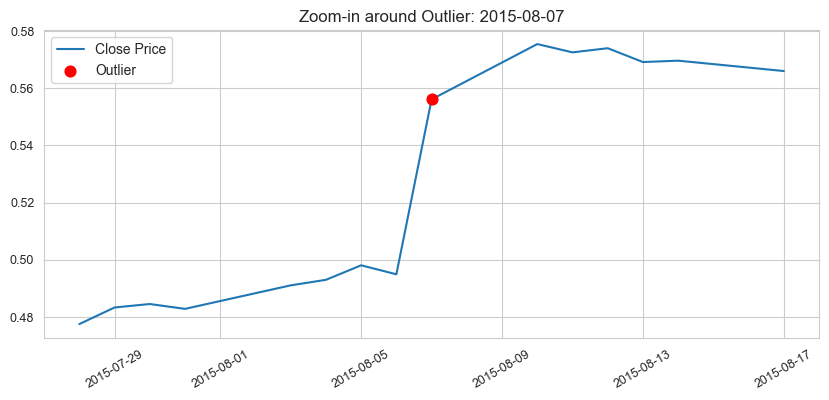

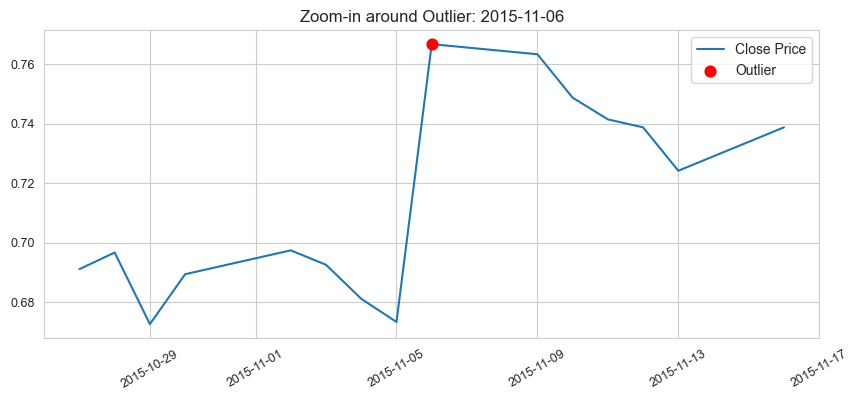

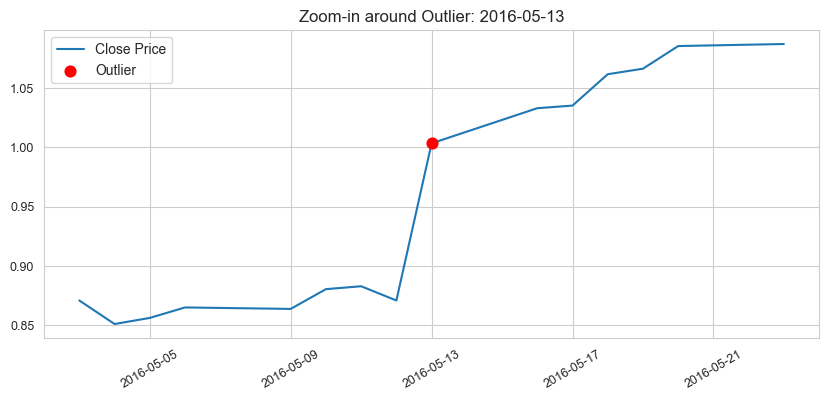

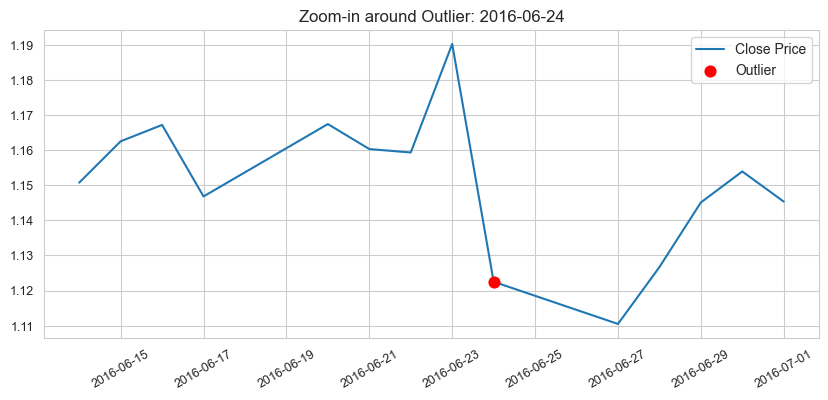

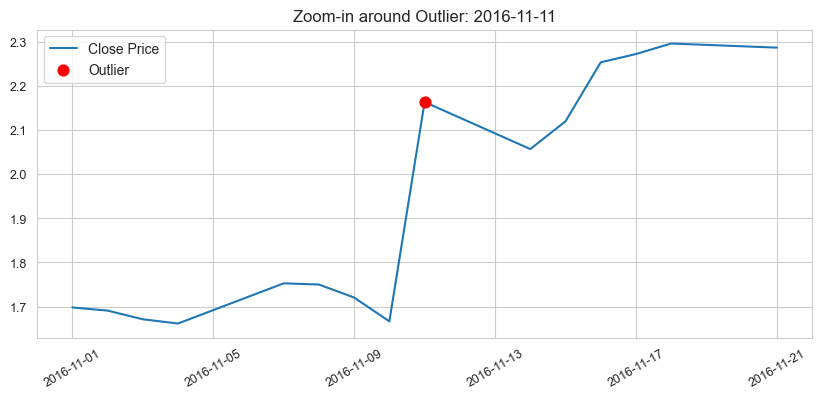

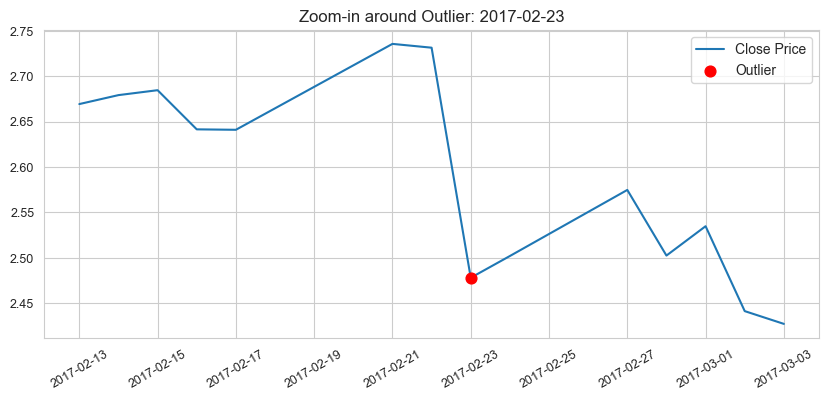

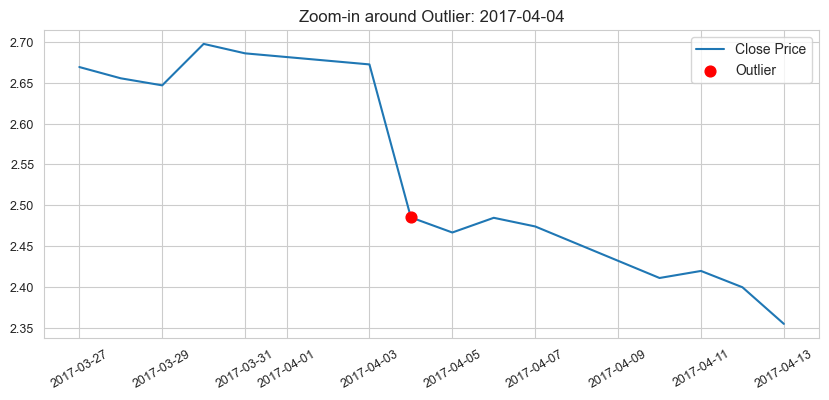

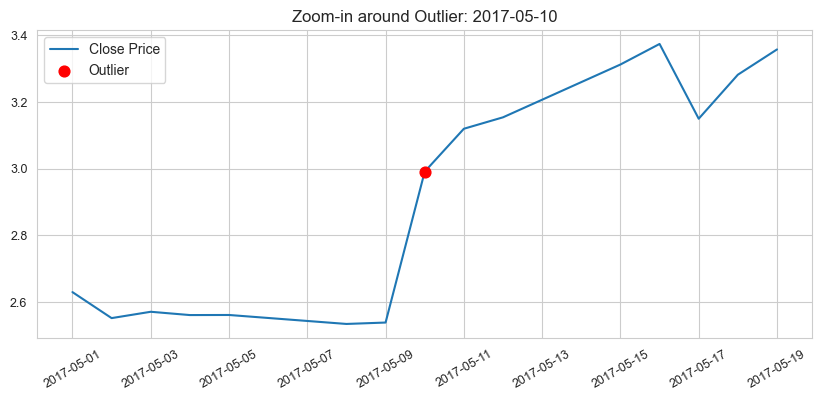

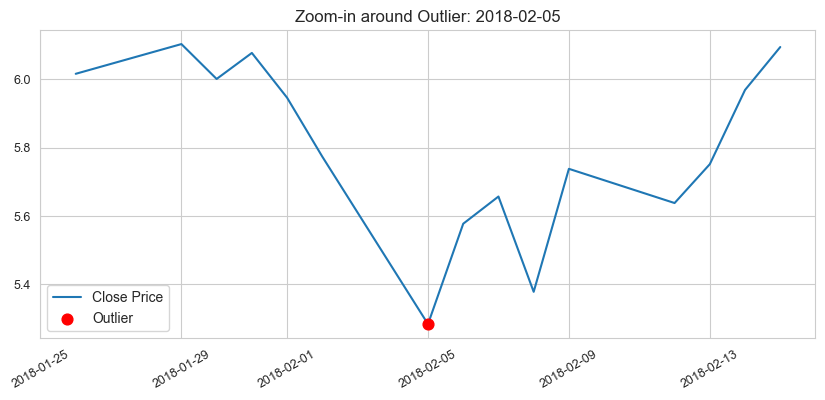

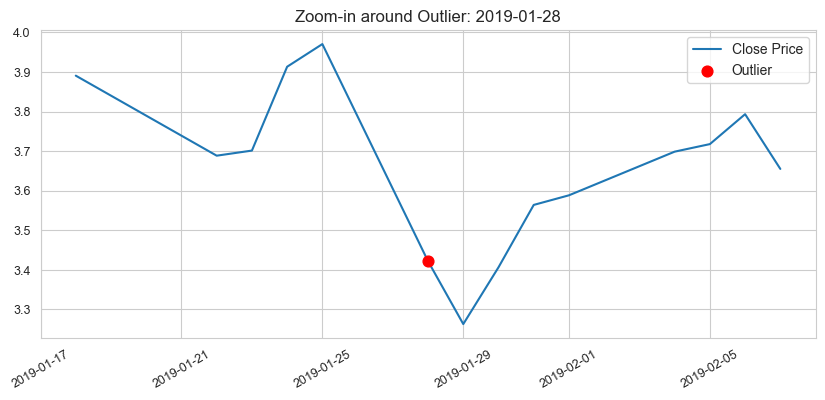

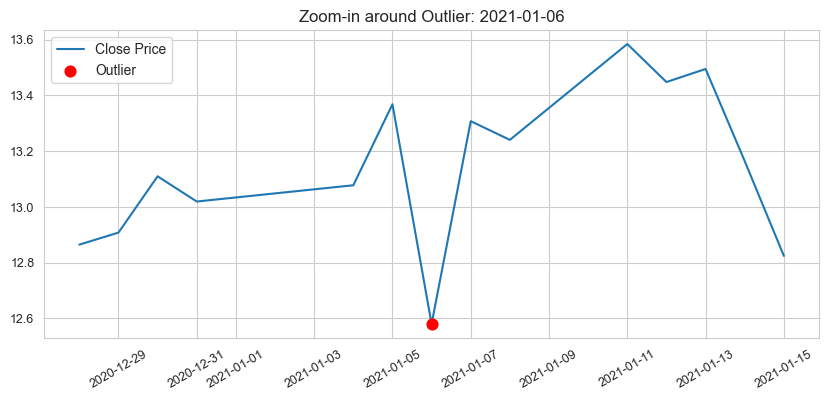

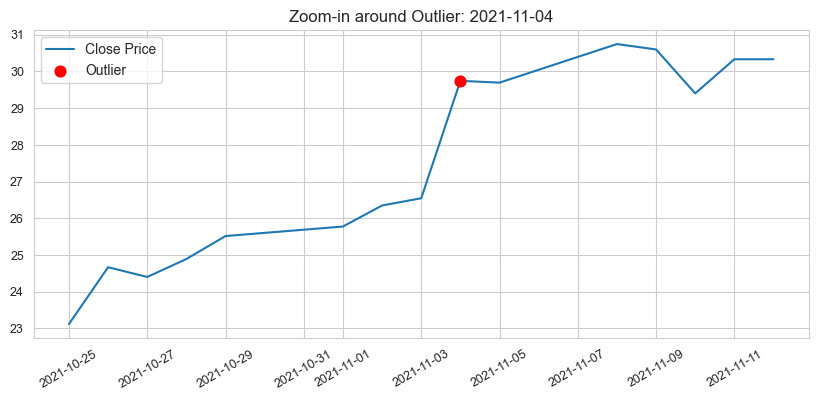

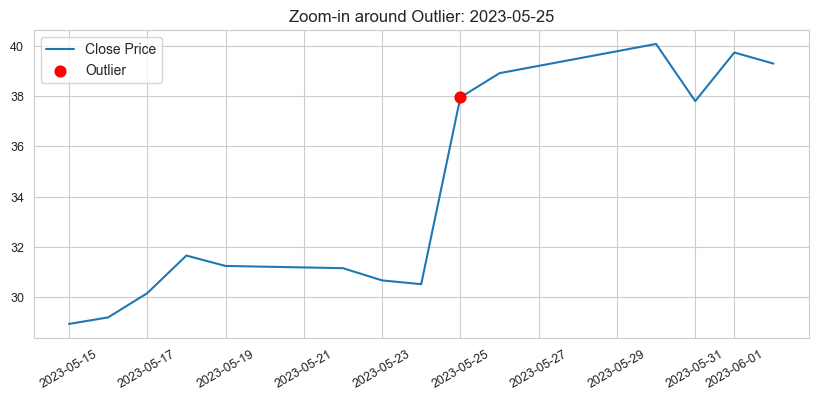

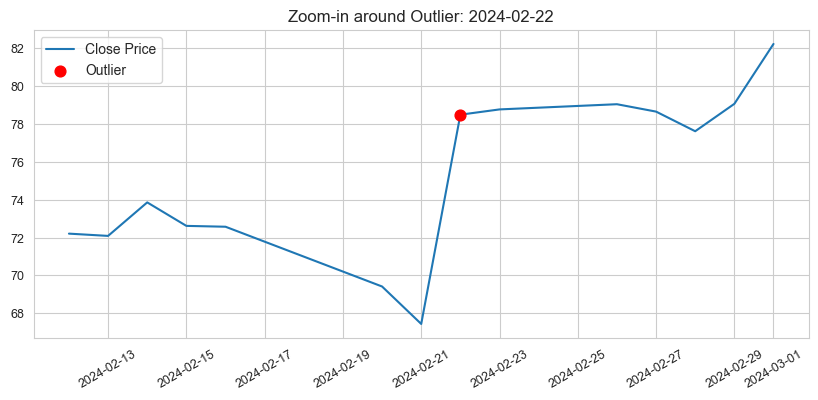

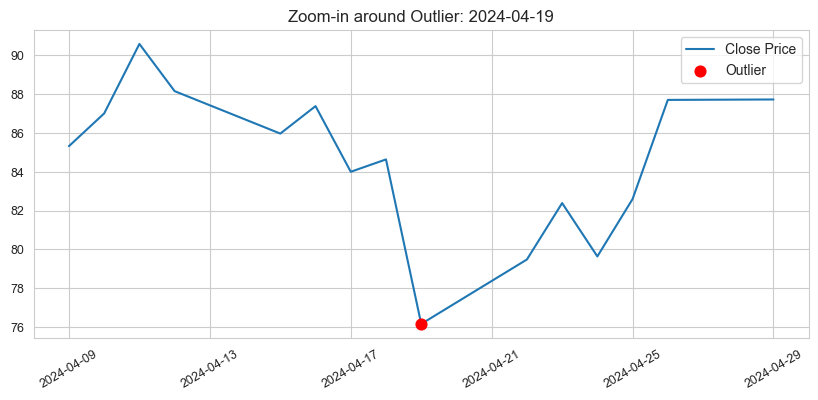

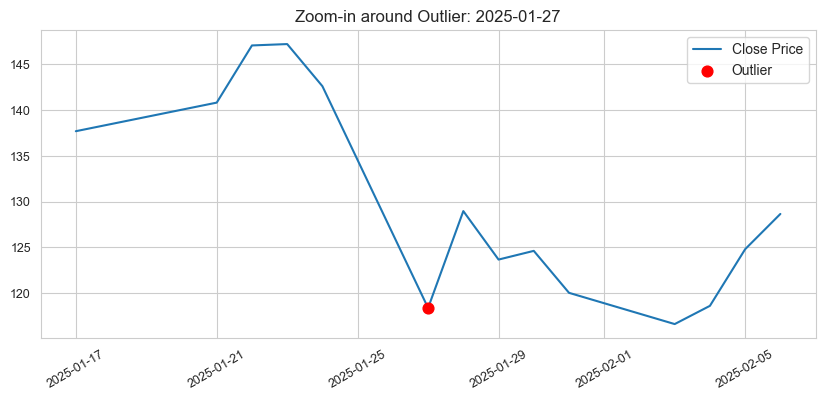

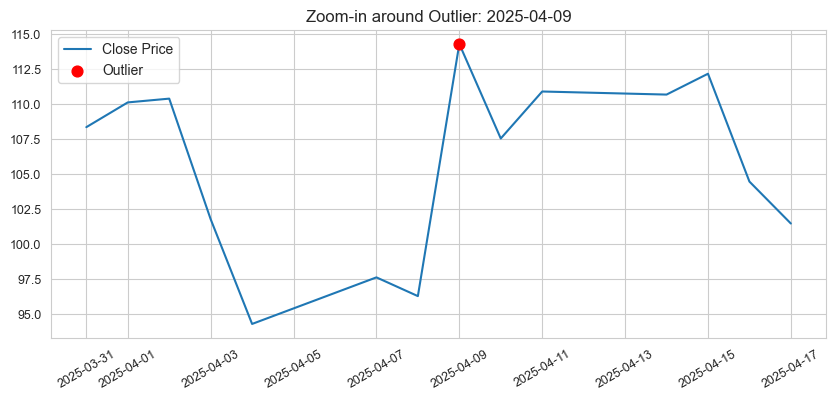

In [42]:
import matplotlib.pyplot as plt

## LogReturn 기반 outlier detection
returns = nvda['LogReturns'].dropna()
roll_mean = returns.rolling(20).mean()
roll_std  = returns.rolling(20).std()

z_local = (returns - roll_mean) / roll_std
local_outlier = z_local.abs() > 3

outlier_dates = returns.index[local_outlier]
outlier_close = nvda.loc[outlier_dates, 'Close']

# 전체 Close + Outlier 표시
plt.figure(figsize=(14,5))
plt.plot(nvda['Close'], label='Close Price')
plt.scatter(outlier_dates, outlier_close, color='red', label='Outliers', zorder=5)
plt.title("nvda Close Price with Local Outliers")
plt.grid(True)
plt.legend()
plt.show()


window = 10  # 앞뒤 10일씩 확대

for date in outlier_dates:
    start = date - pd.Timedelta(days=window)
    end   = date + pd.Timedelta(days=window)

    zoom_data = nvda.loc[start:end]

    plt.figure(figsize=(10,4))
    plt.plot(zoom_data['Close'], label='Close Price')
    plt.scatter([date], [nvda.loc[date, 'Close']], 
                color='red', s=60, label='Outlier', zorder=5)
    plt.xticks(rotation=30, fontsize=9)
    plt.yticks(fontsize=9)
    plt.title(f"Zoom-in around Outlier: {date.date()}")
    plt.grid(True)
    plt.legend()
    plt.show()


# 3. (Sk Hynix, NVDIA) Log Return Correlation

In [43]:
### 서로 완전 무관한 주식일지라도, 둘다 우상향 trend여서 price correlation이 높게 나오는 경우 많음
### log return 값으로 두 주식간 correlation 분석을 진행

In [44]:
sk_cnt = sk_hynix['LogReturns'].dropna().shape[0]
nvda_cnt = nvda['LogReturns'].dropna().shape[0]
print(sk_cnt,nvda_cnt)

2662 2732


In [45]:
df_merged = pd.concat([sk_hynix['LogReturns'].dropna(), nvda['LogReturns'].dropna()], axis=1, join='inner').dropna()
df_merged.columns = ['SK_LogReturn', 'NVDA_LogReturn']
intersect_cnt = df_merged.shape[0]
print(intersect_cnt)

2577


In [46]:
#Check
sk_only = sk_hynix.index.difference(nvda.index)
nvda_only = nvda.index.difference(sk_hynix.index)
print(len(sk_only),len(nvda_only))

if(len(sk_only)+intersect_cnt == sk_cnt ):
    print("Dates aligned correctly for sk.")
else:
    print("sk error")
if(len(nvda_only)+intersect_cnt == nvda_cnt ):
    print("Dates aligned correctly for nvda.")
else:
    print("nvda error")

85 155
Dates aligned correctly for sk.
Dates aligned correctly for nvda.


In [47]:
df_merged.tail()

,SK_LogReturn,NVDA_LogReturn
Date,,
2025-11-06,0.023892,-0.037209
2025-11-07,-0.022166,0.000372
2025-11-10,0.043852,0.056317
2025-11-11,0.021225,-0.030037
2025-11-12,-0.003236,0.003308


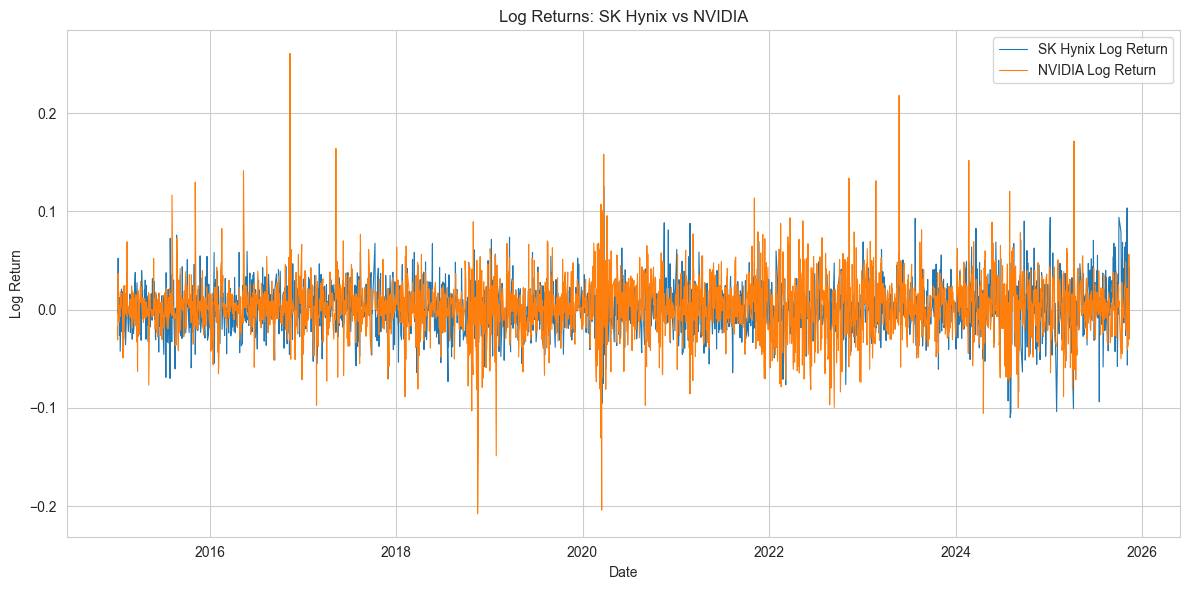

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df_merged.index, df_merged['SK_LogReturn'], label='SK Hynix Log Return', linewidth=0.8)
plt.plot(df_merged.index, df_merged['NVDA_LogReturn'], label='NVIDIA Log Return', linewidth=0.8)
plt.title('Log Returns: SK Hynix vs NVIDIA')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

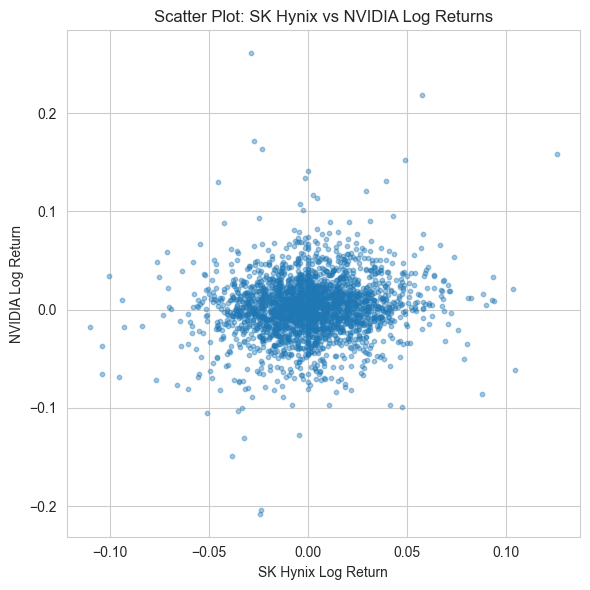

Correlation between SK Hynix and NVIDIA Log Returns: 0.1242


In [49]:
plt.figure(figsize=(6,6))
plt.scatter(df_merged['SK_LogReturn'], df_merged['NVDA_LogReturn'], 
            alpha=0.4, s=10)
plt.title('Scatter Plot: SK Hynix vs NVIDIA Log Returns')
plt.xlabel('SK Hynix Log Return')
plt.ylabel('NVIDIA Log Return')
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = df_merged['SK_LogReturn'].corr(df_merged['NVDA_LogReturn'])
print(f"Correlation between SK Hynix and NVIDIA Log Returns: {correlation:.4f}")

## Rolling Correlation(20,60)

In [50]:
rolling_corr_20 = df_merged['SK_LogReturn'].rolling(20).corr(df_merged['NVDA_LogReturn'])
rolling_corr_60 = df_merged['SK_LogReturn'].rolling(60).corr(df_merged['NVDA_LogReturn'])
print(rolling_corr_20.tail())
print(rolling_corr_60.tail())

Date
2025-11-06    0.173304
2025-11-07    0.354232
2025-11-10    0.462036
2025-11-11    0.417893
2025-11-12    0.416904
dtype: float64
Date
2025-11-06    0.169607
2025-11-07    0.170244
2025-11-10    0.199526
2025-11-11    0.192633
2025-11-12    0.200703
dtype: float64


In [51]:
print(rolling_corr_20.mean())
print(rolling_corr_60.mean())

0.09962434407859998
0.10475501374443687


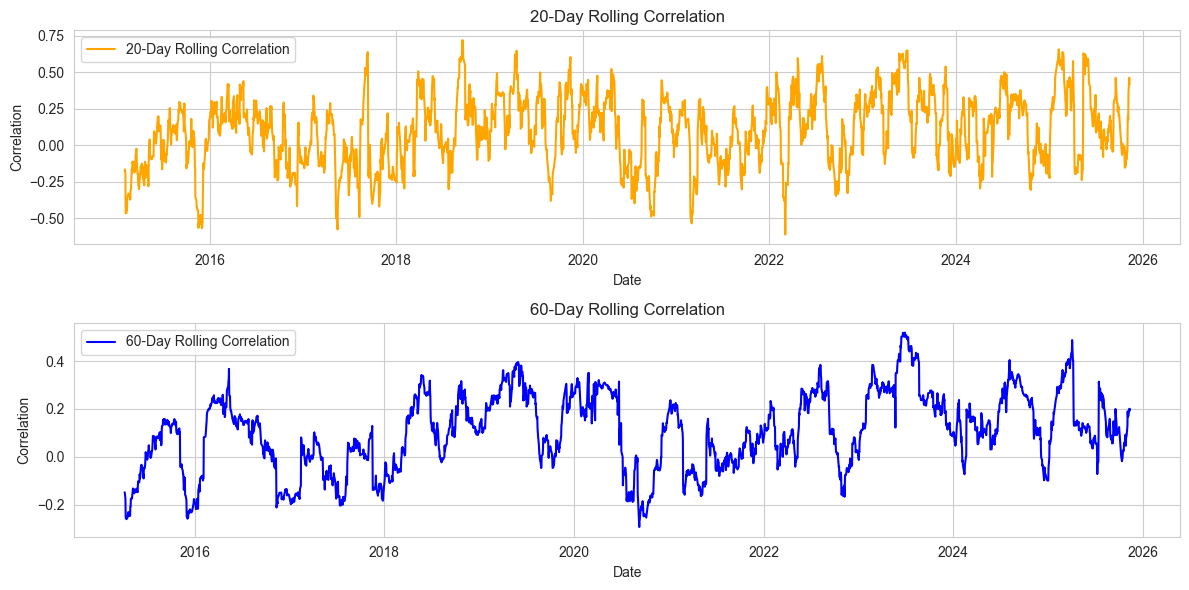

In [52]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(rolling_corr_20, label='20-Day Rolling Correlation', color='orange')
plt.title('20-Day Rolling Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(rolling_corr_60, label='60-Day Rolling Correlation', color='blue')
plt.title('60-Day Rolling Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

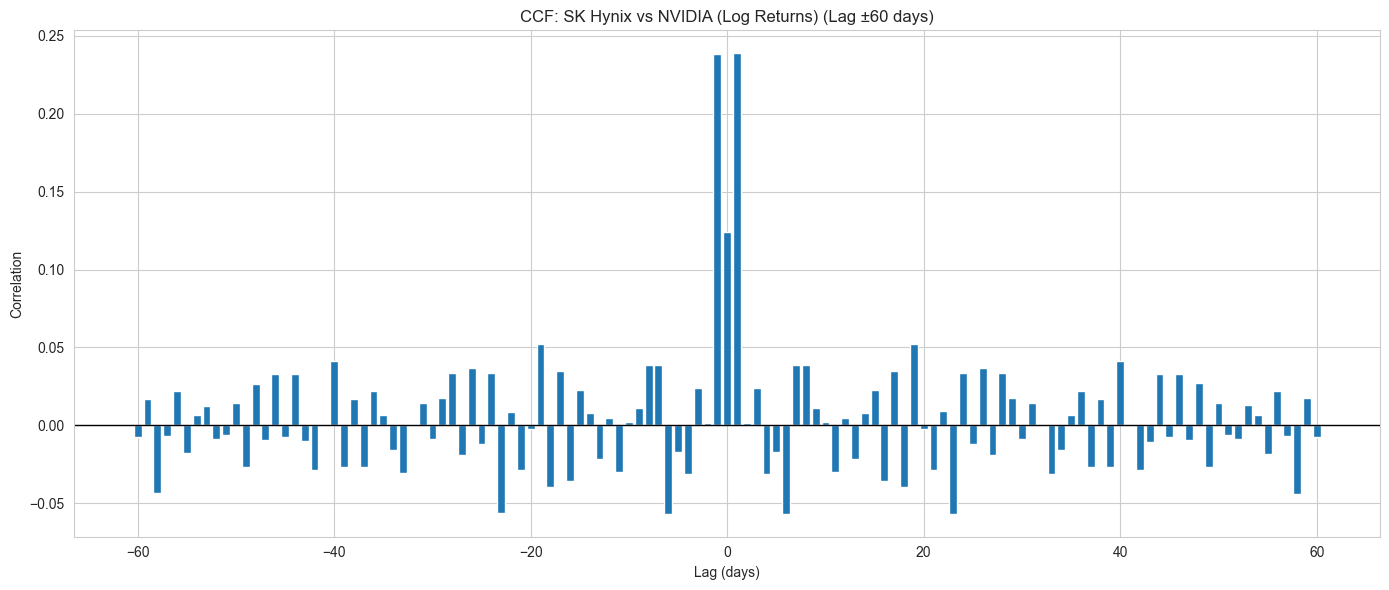

=== Top 3 CCF Lags, Values, and p-values ===
#1: Lag = 1,  CCF = 0.2386,  p-value = 0.5932
#2: Lag = -1,  CCF = 0.2386,  p-value = 0.0000
#3: Lag = 0,  CCF = 0.1242,  p-value = 0.0000


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf
from scipy.stats import pearsonr

# 1)
x = df_merged['SK_LogReturn'].dropna()
y = df_merged['NVDA_LogReturn'].dropna()


min_len = min(len(x), len(y))
x = x.iloc[-min_len:]
y = y.iloc[-min_len:]

# 2) Positive lags
max_lag = 60
ccf_pos = ccf(x, y)[:max_lag+1]   # lag = 0 ~ 60

# 3) Negative lags 
ccf_neg = []
for k in range(1, max_lag+1):
    corr_val = np.corrcoef(x[k:], y[:-k])[0,1]
    ccf_neg.append(corr_val)

ccf_neg = np.array(ccf_neg[::-1])  # -60 → -1 순으로 정렬

# 4) 전체 CCF
full_ccf = np.concatenate([ccf_neg, ccf_pos])
lags = np.arange(-max_lag, max_lag+1)

# 5) Plot
plt.figure(figsize=(14,6))
plt.bar(lags, full_ccf, width=0.8)
plt.axhline(0, color='black', linewidth=1)
plt.title("CCF: SK Hynix vs NVIDIA (Log Returns) (Lag ±60 days)")
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6) Top 3 CCF + p-value 계산
top3_idx = np.argsort(full_ccf)[-3:][::-1]

print("=== Top 3 CCF Lags, Values, and p-values ===")
for rank, idx in enumerate(top3_idx, 1):
    lag = lags[idx]
    ccf_val = full_ccf[idx]

    # p-value 계산
    if lag >= 0:
        # corr(x_t, y_{t+lag})
        valid_x = x[:len(x)-lag]
        valid_y = y[lag:]
    else:
        # corr(x_{t+|lag|}, y_t)
        abs_lag = abs(lag)
        valid_x = x[abs_lag:]
        valid_y = y[:len(y)-abs_lag]

    # Pearson correlation p-value
    r, pval = pearsonr(valid_x, valid_y)

    print(f"#{rank}: Lag = {lag},  CCF = {ccf_val:.4f},  p-value = {pval:.4f}")



- Best lag: Lag = -1(p-value = 0.0) & Lag = 0(p-value = 0.0)
- NVIDIA가 SK하이닉스를 약 1일 정도, 매우 약한 상관 수준에서 선행하는 것으로 나타난다고 해석 가능.

### CoIntegration Test

In [54]:
from statsmodels.tsa.stattools import coint
import pandas as pd

# X, Y는 price series여야 함 (log return으로 하면 안됨!)
X = sk_hynix['Close']
Y = nvda['Close']

# 1) inner join (공통 날짜만)
df = pd.concat([X, Y], axis=1, join='inner')
df.columns = ['SK', 'NVDA']

# 2) Engle-Granger cointegration test
score, pvalue, _ = coint(df['SK'], df['NVDA'])

print("Cointegration Test p-value =", pvalue)

if pvalue < 0.05:
    print("→ 두 자산은 cointegrated (장기 균형 관계가 있음)")
else:
    print("→ cointegration 없음 (장기적 관계 약함)")


Cointegration Test p-value = 0.8642355680442184
→ cointegration 없음 (장기적 관계 약함)
